In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import seaborn as sns

%matplotlib inline  

https://interfaithdental.com/smile-on-60/advocate/
Tennessee ranks 49th in senior dental care. 22% of older Tennesseans will lose all their natural teeth. 

SMILE ON 60+ is a statewide initiative with the goal of improving the overall health of low-income, mobile seniors age 60+ through access to oral healthcare services and community education.  SMILE ON 60+ will evaluate, educate, and navigate seniors into dental homes and then transport, treat, and repeat.

The funding for this project was provided through a grant awarded by the Davidson County Chancery Court, Part III from the SeniorTrust/ElderTrust settlement (Case No. 11-1548-III) and through a contract administered by the Tennessee Commission on Aging and Disability.

State Stats: https://nccd.cdc.gov/oralhealthdata/rdPage.aspx?rdReport=DOH_DATA.ExploreByLocation&rdProcessAction=&SaveFileGenerated=1&islLocation=47&rdICL-iclTopic=ADT&iclTopic_rdExpandedCollapsedHistory=&iclTopic=ADT&islYear=2018&hidLocation=47&hidTopic=ADT&hidYear=2018&irbShowFootnotes=Show&rdICL-iclIndicators=ADT1_1%2cADT1_3%2cADT1_4&iclIndicators_rdExpandedCollapsedHistory=&iclIndicators=ADT1_1%2cADT1_3%2cADT1_4&hidPreviouslySelectedIndicators=&DashboardColumnCount=2&rdShowElementHistory=&rdScrollX=0&rdScrollY=0&rdRnd=69609

In [2]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [38]:
TN_poverty = pd.read_excel('../data/PovertyEstimates.xls')

MapLocSplit = TN_poverty["Area_name"].str.rsplit(" ", n = 1, expand = True) 
TN_poverty["name"]= MapLocSplit[0] 
TN_poverty["county"]= MapLocSplit[1] 

TN_poverty.tail(15)

,FIPStxt,Stabr,Area_name,POVALL_2018,PCTPOVALL_2018,name,county
80,47161,TN,Stewart County,1867,13.9,Stewart,County
81,47163,TN,Sullivan County,25549,16.5,Sullivan,County
82,47165,TN,Sumner County,16426,8.9,Sumner,County
83,47167,TN,Tipton County,7240,12.0,Tipton,County
84,47169,TN,Trousdale County,1570,18.6,Trousdale,County
85,47171,TN,Unicoi County,2797,16.1,Unicoi,County
86,47173,TN,Union County,3858,19.8,Union,County
87,47175,TN,Van Buren County,918,16.3,Van Buren,County
88,47177,TN,Warren County,9025,22.5,Warren,County
89,47179,TN,Washington County,18528,14.9,Washington,County


In [4]:
smileon_full = pd.read_csv('../data/SmileOn11.28.2020.csv', skiprows=2, encoding='ISO-8859-1')

smileon_full.head()

C:\Users\kkosf\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [5]:
print(smileon_full.info())
smileon_full.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 56.2+ MB
None


<bound method DataFrame.info of        CallReportNum              ReportVersion  LinkedToCallReportNum  \
0           81381827  SMILE ON 60+ Registration                    NaN   
1           81379177  SMILE ON 60+ Registration                    NaN   
2           81377435      SMILE ON 60+ Clinical                    NaN   
3           81375215      SMILE ON 60+ Clinical                    NaN   
4           81373934      SMILE ON 60+ Clinical                    NaN   
...              ...                        ...                    ...   
40027       53192452  SMILE ON 60+ Registration                    NaN   
40028       67915561  SMILE ON 60+ Registration                    NaN   
40029       67251405      SMILE ON 60+ Clinical                    NaN   
40030       63063150      SMILE ON 60+ Clinical                    NaN   
40031       70839903      SMILE ON 60+ Clinical                    NaN   

      CallDateAndTimeStart CallDateAndTimeEnd  CallLength  CallerNum  \
0      

In [6]:
smileon_full.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
LinkedToCallReportNum                                                                                                                                                      40031
CallDateAndTimeStart                                                                                                                                                           0
CallDateAndTimeEnd                                                                                                                                                             0
                                                                                                                   

In [7]:
smileon_full.StateProvince.value_counts()

TN    40004
VA       16
KY        2
GA        2
MS        1
Name: StateProvince, dtype: int64

In [8]:
smileon_full['SMILE ON 60+ Site Information - Enroller Location'].value_counts()

Provider Site           23304
Health Assist Office     2573
Tooth Wisdom             1351
Outreach                  239
Senior Center             216
Name: SMILE ON 60+ Site Information - Enroller Location, dtype: int64

In [9]:
smileon_full['SMILE ON 60+ Case Management Information - Dental Clinic'].value_counts()

Interfaith Dental Clinic - Nashville                                                    487
Interfaith Dental Clinic - Murfreesboro                                                 180
Church Health Center - Memphis                                                           24
Karis Dental Clinic - Cleveland                                                          16
Friends in Need Health Center - Kingsport                                                11
Interfaith Health Clinic of Knoxville - Knoxville                                         9
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties      1
Name: SMILE ON 60+ Case Management Information - Dental Clinic, dtype: int64

In [10]:
# create a new dataframe with fewer columns:

smileon = smileon_full[['CallReportNum', 'ReportVersion', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallerNum', 
                        'CityName', 'CountyName', 'PostalCode', 'EnteredOn', 
                        'SMILE ON 60+ Screening - Last Screening Date', 
                        'SMILE ON 60+ Case Management Information - Dental Clinic',
                        'SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?', 
                        'SMILE ON 60+ Clinic Information - Was initial appointment made?',
                        'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?',
                        'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                        'SMILE ON 60+ Screening - How often do you brush your teeth?', 
                        'SMILE ON 60+ Screening - Need for Periodontal Care',
                        'SMILE ON 60+ Screening - Root Fragments', 
                        'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions',
                        'SMILE ON 60+ Screening - Treatment Urgency', 
                        'SMILE ON 60+ Screening - Untreated Decay', 
                        'SMILE ON 60+ Site Information - Enroller ID',
                        'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 
                        'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
                        'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
                       ]]

#and rename the columns to make things easier:

smileon = smileon.rename(columns = {'SMILE ON 60+ Screening - Last Screening Date': 'Last_Screen_Date', 
                                    'SMILE ON 60+ Case Management Information - Dental Clinic' : 'Case_Mgmt_Clinic',
                                    'SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?' :'Date_Last_Seen', 
                                    'SMILE ON 60+ Clinic Information - Was initial appointment made?' :'Initial_Appt_Made',
                                    'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?': 'Last_Dentist_Visit',
                                    'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)' : 'Care_Provided',
                                    'SMILE ON 60+ Screening - How often do you brush your teeth?' : 'Brush_Frequency', 
                                    'SMILE ON 60+ Screening - Need for Periodontal Care' : 'Need_For_Care',
                                    'SMILE ON 60+ Screening - Root Fragments' : 'Root_Fragments', 
                                    'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions' : 'Lesions',
                                    'SMILE ON 60+ Screening - Treatment Urgency' : 'Urgency', 
                                    'SMILE ON 60+ Screening - Untreated Decay' : 'Decay', 
                                    'SMILE ON 60+ Site Information - Enroller ID' : 'Clinic_Attended',
                                    'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?' : 'Tx_Plan_Complete', 
                                    'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?' : 'Tx_Plan_Developed',
                                    'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)' :
                                    'Function_Restored'
                                                
                                   })

smileon.head()

#'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home?',

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Last_Screen_Date,...,Brush_Frequency,Need_For_Care,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored
0,81381827,SMILE ON 60+ Registration,11/25/2020 16:46,11/25/2020 16:48,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,11/25/2020 15:40,11/25/2020 15:55,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,11/25/2020 15:02,11/25/2020 15:02,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,81375215,SMILE ON 60+ Clinical,11/25/2020 14:17,11/25/2020 14:17,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,11/25/2020 13:50,11/25/2020 13:58,-1,NaN,NaN,NaN,11/25/2020 13:58,11/25/2020,...,Once daily,NaN,Yes,NaN,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,Yes,No


In [11]:
smileon.isnull().sum()

CallReportNum               0
ReportVersion               0
CallDateAndTimeStart        0
CallDateAndTimeEnd          0
CallerNum                   0
CityName                  628
CountyName                347
PostalCode               2640
EnteredOn                   0
Last_Screen_Date        25140
Case_Mgmt_Clinic        39304
Date_Last_Seen          36504
Initial_Appt_Made       35704
Last_Dentist_Visit       2808
Care_Provided           15183
Brush_Frequency         35408
Need_For_Care           35545
Root_Fragments          35319
Lesions                 35609
Urgency                 35231
Decay                   35149
Clinic_Attended          7231
Tx_Plan_Complete        22497
Tx_Plan_Developed       23004
Function_Restored       25756
dtype: int64

In [12]:
smileon.CallerNum.nunique()

8708

In [13]:
smileon.CallerNum.value_counts()

#what does '-1' mean? 
#many entries in the 20's and 30's, need to explore those

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [14]:
smileon = smileon.loc[~smileon['CallerNum'].isin(['-1', '-2'])]
smileon.CallerNum.value_counts()

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
           ..
2536760     1
2510267     1
3200276     1
2450144     1
2496365     1
Name: CallerNum, Length: 8706, dtype: int64

In [15]:
smileon['CallDateAndTimeStart'] = pd.to_datetime(smileon['CallDateAndTimeStart'])
smileon['date'] = smileon['CallDateAndTimeStart'].dt.date
smileon['time'] = smileon['CallDateAndTimeStart'].dt.time

smileon.head(3)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Last_Screen_Date,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
0,81381827,SMILE ON 60+ Registration,2020-11-25 16:46:00,11/25/2020 16:48,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,NaN,...,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN,2020-11-25,16:46:00
1,81379177,SMILE ON 60+ Registration,2020-11-25 15:40:00,11/25/2020 15:55,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-25,15:40:00
2,81377435,SMILE ON 60+ Clinical,2020-11-25 15:02:00,11/25/2020 15:02,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,NaN,...,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Yes,Yes,Yes,2020-11-25,15:02:00


In [16]:
smileon.ReportVersion.value_counts()

#over twice as many clinical than registration (difference of 14,832)

SMILE ON 60+ Clinical        27357
SMILE ON 60+ Registration    12595
Name: ReportVersion, dtype: int64

In [17]:
smileon.Brush_Frequency.value_counts()

twice daily          2223
Once daily           1773
None                  289
three times daily     247
four times daily       32
Name: Brush_Frequency, dtype: int64

In [18]:
smileon.CountyName.value_counts()

Davidson           9292
Shelby             7398
Rutherford         3798
Sullivan           2209
Bradley            1789
                   ... 
Desoto                1
Pulaski               1
McNairy               1
Winchester City       1
Fulton                1
Name: CountyName, Length: 104, dtype: int64

In [19]:
smileon.PostalCode.value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

In [20]:
print(smileon['Clinic_Attended'].nunique())

smileon['Clinic_Attended'].value_counts()

31


Interfaith Dental Clinic - Nashville                                                    5794
Interfaith Dental Clinic - Murfreesboro                                                 3646
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1345
Keystone Dental Care Inc. - Johnson City                                                1031
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [21]:
smileon.Decay.value_counts()

Yes           3276
No            1328
Edentulous     218
Name: Decay, dtype: int64

In [22]:
smileon.Root_Fragments.value_counts()

No     3333
Yes    1323
Name: Root_Fragments, dtype: int64

In [23]:
smileon.Lesions.value_counts()

No     4145
Yes     217
Name: Lesions, dtype: int64

In [24]:
smileon.Tx_Plan_Complete.value_counts()

No     12431
Yes     5103
Name: Tx_Plan_Complete, dtype: int64

In [25]:
smileon.Tx_Plan_Developed.value_counts()

Yes    15927
No      1095
Name: Tx_Plan_Developed, dtype: int64

In [26]:
smileon.Function_Restored.value_counts()

No     8123
Yes    6149
Name: Function_Restored, dtype: int64

In [27]:
smileon.date.value_counts()

2020-03-09    166
2019-10-01    147
2019-10-08    145
2020-02-27    145
2020-01-13    144
             ... 
2019-06-29      1
2020-11-21      1
2018-05-15      1
2019-11-29      1
2020-02-01      1
Name: date, Length: 640, dtype: int64

In [28]:
smileon.CallerNum.value_counts().head(20)

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
2412580    26
2508895    25
3483924    25
2605896    25
2384974    24
2585132    23
2519897    23
2758336    23
2390065    23
2398755    23
2413871    23
2425664    22
2384932    22
2509118    22
2402037    22
Name: CallerNum, dtype: int64

In [29]:
CallerNums = smileon.groupby('CallerNum')

In [30]:
CallerNums.get_group(2441776)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Last_Screen_Date,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
685,80878764,SMILE ON 60+ Clinical,2020-11-05 14:46:00,11/5/2020 14:47,2441776,Antioch,Davidson,37013.0,11/12/2020 14:47,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-11-05,14:46:00
1024,80784223,SMILE ON 60+ Clinical,2020-10-29 11:48:00,10/29/2020 11:49,2441776,Antioch,Davidson,37013.0,11/10/2020 11:49,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-10-29,11:48:00
3353,79037448,SMILE ON 60+ Clinical,2020-09-14 11:42:00,9/14/2020 11:43,2441776,Antioch,Davidson,37013.0,9/23/2020 11:43,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-09-14,11:42:00
3812,78220913,SMILE ON 60+ Clinical,2020-09-02 13:45:00,9/2/2020 13:47,2441776,Antioch,Davidson,37013.0,9/2/2020 13:47,9/2/2020,...,No,Yes,Early care-within next several weeks,Yes,Interfaith Dental Clinic - Nashville,NaN,Yes,NaN,2020-09-02,13:45:00
3833,78698465,SMILE ON 60+ Clinical,2020-09-02 11:21:00,9/2/2020 11:22,2441776,Antioch,Davidson,37013.0,9/16/2020 11:22,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-09-02,11:21:00
5312,77631129,SMILE ON 60+ Clinical,2020-08-05 11:14:00,8/5/2020 11:15,2441776,Antioch,Davidson,37013.0,8/17/2020 11:15,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-08-05,11:14:00
5906,76991587,SMILE ON 60+ Clinical,2020-07-23 09:33:00,7/23/2020 9:34,2441776,Antioch,Davidson,37013.0,7/30/2020 9:34,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-07-23,09:33:00
6439,76991448,SMILE ON 60+ Clinical,2020-07-13 09:30:00,7/13/2020 9:31,2441776,Antioch,Davidson,37013.0,7/30/2020 9:31,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-07-13,09:30:00
11473,71557178,SMILE ON 60+ Clinical,2020-02-27 08:30:00,2/27/2020 8:32,2441776,Antioch,Davidson,37013.0,3/10/2020 8:32,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,Yes,Yes,Yes,2020-02-27,08:30:00
14542,70184765,SMILE ON 60+ Clinical,2020-01-16 14:39:00,1/16/2020 14:40,2441776,Antioch,Davidson,37013.0,1/23/2020 14:40,9/25/2018,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-01-16,14:39:00


In [31]:
CallerNums.get_group(2416076)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Last_Screen_Date,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
1193,80792354,SMILE ON 60+ Clinical,2020-10-26 14:05:00,10/26/2020 14:08,2416076,Madison,Davidson,37115.0,11/10/2020 14:08,10/26/2020,...,No,No,Early care-within next several weeks,Yes,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-10-26,14:05:00
4030,78500974,SMILE ON 60+ Clinical,2020-08-31 14:38:00,8/31/2020 14:39,2416076,Madison,Davidson,37115.0,9/10/2020 14:39,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-08-31,14:38:00
5497,77329572,SMILE ON 60+ Clinical,2020-07-31 22:44:00,7/31/2020 22:45,2416076,Madison,Davidson,37115.0,8/8/2020 22:45,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,No,Yes,No,2020-07-31,22:44:00
13125,70810955,SMILE ON 60+ Clinical,2020-02-05 09:54:00,2/5/2020 9:54,2416076,Madison,Davidson,37115.0,2/13/2020 9:54,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-02-05,09:54:00
14930,70080607,SMILE ON 60+ Clinical,2020-01-13 12:49:00,1/13/2020 12:52,2416076,Madison,Davidson,37115.0,1/20/2020 12:52,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-01-13,12:49:00
16025,69737230,SMILE ON 60+ Clinical,2019-12-19 11:37:00,12/19/2019 11:38,2416076,Madison,Davidson,37115.0,1/8/2020 11:38,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2019-12-19,11:37:00
18407,68190928,SMILE ON 60+ Clinical,2019-11-13 10:17:00,11/13/2019 10:18,2416076,Madison,Davidson,37115.0,11/15/2019 10:18,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-11-13,10:17:00
22967,66380005,SMILE ON 60+ Clinical,2019-09-11 14:14:00,9/11/2019 14:15,2416076,Madison,Davidson,37115.0,9/16/2019 14:15,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-09-11,14:14:00
24167,65850976,SMILE ON 60+ Clinical,2019-08-26 10:12:00,8/26/2019 10:13,2416076,Madison,Davidson,37115.0,8/28/2019 10:13,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-08-26,10:12:00
26184,65220398,SMILE ON 60+ Clinical,2019-07-24 14:32:00,7/24/2019 14:33,2416076,Madison,Davidson,37115.0,8/6/2019 14:33,NaN,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2019-07-24,14:32:00


In [32]:
no_dups = smileon.drop_duplicates(subset='CallerNum', keep="first")
no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 40021
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CallReportNum         8706 non-null   int64         
 1   ReportVersion         8706 non-null   object        
 2   CallDateAndTimeStart  8706 non-null   datetime64[ns]
 3   CallDateAndTimeEnd    8706 non-null   object        
 4   CallerNum             8706 non-null   int64         
 5   CityName              8528 non-null   object        
 6   CountyName            8594 non-null   object        
 7   PostalCode            8024 non-null   float64       
 8   EnteredOn             8706 non-null   object        
 9   Last_Screen_Date      2545 non-null   object        
 10  Case_Mgmt_Clinic      44 non-null     object        
 11  Date_Last_Seen        594 non-null    object        
 12  Initial_Appt_Made     735 non-null    object        
 13  Last_Dentist_Visi

In [50]:
county_counts = no_dups.CountyName.value_counts()

county_counts = county_counts.to_frame().reset_index()

county_counts = county_counts.rename(columns = {'index': 'CountyName', 'CountyName': 'total'})
county_counts.head()

,CountyName,total
0,Davidson,1684
1,Shelby,1677
2,Rutherford,660
3,Sullivan,466
4,Knox,429


In [39]:
pov_map = pd.merge(left = counties, right = TN_poverty, 
                    left_on = 'NAME', right_on = 'name')
print(pov_map.shape)
pov_map.head(3)

(95, 13)


,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,FIPStxt,Stabr,Area_name,POVALL_2018,PCTPOVALL_2018,name,county
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47023,TN,Chester County,2555,15.9,Chester,County
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",47181,TN,Wayne County,3066,21.3,Wayne,County
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",47167,TN,Tipton County,7240,12.0,Tipton,County


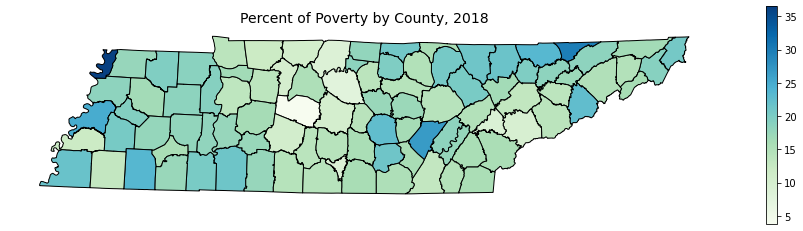

In [44]:
fig, ax = plt.subplots(figsize=(16,4))
pov_map.plot(column = 'PCTPOVALL_2018', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percent of Poverty by County, 2018', fontsize = 14)
ax.axis('off');

In [51]:
smileon_map = pd.merge(left = counties, right = county_counts, 
                    left_on = 'NAME', right_on = 'CountyName')
print(smileon_map.shape)
smileon_map.head(3)

(92, 8)


,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,CountyName,total
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,6
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,18
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,40


<ipython-input-70-ffc467a6dce3>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['total'],


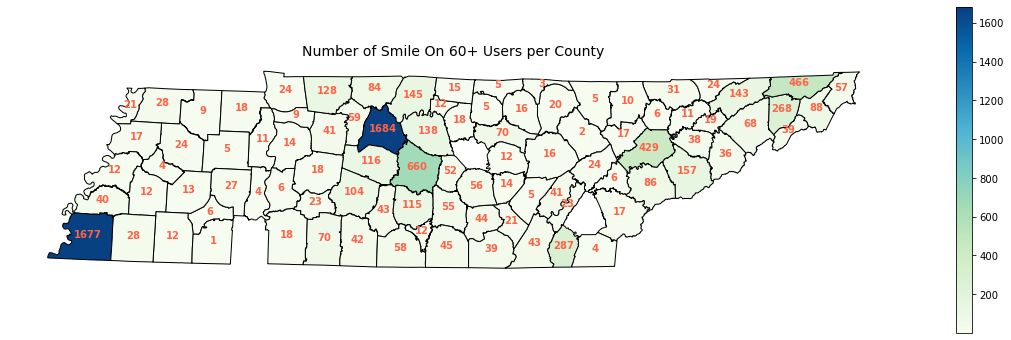

In [70]:
fig, ax = plt.subplots(figsize=(20,6))
smileon_map.plot(column = 'total', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)

for index, row in smileon_map.iterrows():
    plt.annotate(s=row['total'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', color = 'tomato')
    
plt.title('Number of Smile On 60+ Users per County', fontsize = 14)
ax.axis('off');

In [36]:
#Paul's code for splitting out duplicates and determining "success" rate:
visits = smileon['CallerNum'].value_counts()
print(visits)

patients = visits.to_frame().reset_index()
print(patients.head())

patients = patients.rename(columns = {'index': 'caller_num', 'CallerNum': 'number_of_visits'})
print(patients.head())

patients['success'] = ''
print(patients.head())

for ind, row in smileon.iterrows():
    if row['Tx_Plan_Complete'] == 'Yes':
        patients.loc[ind, 'success'] = 'Yes'
    elif row['Tx_Plan_Complete'] == 'No':
        patients.loc[ind, 'success'] ='No'
    else:
        patients.loc[ind, 'success'] ='unknown'
patients.head()

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
           ..
2536760     1
2510267     1
3200276     1
2450144     1
2496365     1
Name: CallerNum, Length: 8706, dtype: int64
     index  CallerNum
0  2441776         36
1  2431132         31
2  2416076         29
3  2860770         28
4  2466994         28
   caller_num  number_of_visits
0     2441776                36
1     2431132                31
2     2416076                29
3     2860770                28
4     2466994                28
   caller_num  number_of_visits success
0     2441776                36        
1     2431132                31        
2     2416076                29        
3     2860770                28        
4     2466994                28        


,caller_num,number_of_visits,success
0,2441776.0,36.0,unknown
1,2431132.0,31.0,unknown
2,2416076.0,29.0,Yes
3,2860770.0,28.0,unknown
4,2466994.0,28.0,
